# Homework III

Joana Peixinho (ist1103335) & Miguel Fernandes (ist1103573)


## I. Pen and Paper [12v]

For questions in this group, show your numerical results with 5 decimals or scientific notation.
Hint: we highly recommend the use of numpy (e.g., linalg.pinv for inverse) or other programmatic
facilities to support the calculus involved in both questions (1) and (2).


### 1) Consider the problem of learning a regression model from 4 bivariate observations{(0.7−0.3) , (0.40.5) , (−0.20.8) , (−0.40.3)} with targets (0.8, 0.6, 0.3, 0.3).

**a.) . [4v] Given the radial basis function, 𝜙𝑗(𝑥) = 𝑒𝑥𝑝 (−(‖𝐱−𝒄𝑗‖^2)/2), that transforms the original space onto a new space characterized by the similarity of the original observations to the following data points, {𝒄1 = (0,0) , 𝒄2 = (1,−1) , 𝒄3 = (−1,1)}. Learn the Ridge regression (𝑙2 regularization) using the closed solution with 𝜆 = 0.1.**



In [ ]:
import numpy as np

# Given data
observations = np.array([[0.7, -0.3], [0.4, 0.5], [-0.2, 0.8], [-0.4, 0.3]])
targets = np.array([0.8, 0.6, 0.3, 0.3])
c_points = np.array([[0, 0], [1, -1], [-1, 1]])
λ = 0.1

# Step 1: Compute radial basis function features
def radial_basis_function(x, c):
    return np.exp(-np.linalg.norm(x - c)**2 / 2)

phi = np.array([[radial_basis_function(x, c) for c in c_points] for x in observations])

# Include a column of ones for the bias term in the feature matrix
X = np.hstack((np.ones((observations.shape[0], 1)), phi))

# Step 2: Set up Ridge regression problem
y = targets.reshape(-1, 1)

# Step 3: Solve for weights
I = np.identity(X.shape[1])
w = np.linalg.inv(X.T @ X + λ*I) @ X.T @ y

# Extract the bias term w0
w0 = w[0, 0]

# Extract the other weights (w1, w2, ..., wn)
weights = w[1:]

# Print the weights
print("Matrix X:")
print(np.around(X, decimals=5))
print("Vector y:")
print(y)
print("Weights:")
print(np.around(w, decimals=5))


**b.) [2v] Compute the training RMSE for the learnt regression.**


In [ ]:
# Calculate the Root Mean Square Error
y_pred = X @ w
RMSE = np.sqrt(np.mean((y - y_pred)**2))
print("Predicted targets:")
print(np.around(y_pred, decimals=5))
print("RMSE:", np.around(RMSE, decimals=5))

### 2) [6v] Consider a MLP classifier of three outcomes – 𝐴, 𝐵 and 𝐶 – characterized by the weights.


![Rest of the Exercise](./I_2_exercise.png)

## Programming [8v]

**Consider the winequality-red.csv dataset (available at the webpage) where the goal is to estimate
the quality (sensory appreciation) of a wine based on physicochemical inputs.
Using a 80-20 training-test split with a fixed seed (random_state=0), you are asked to learn MLP
regressors to answer the following questions.
Given their stochastic behavior, average the performance of each MLP from 10 runs
(for reproducibility consider seeding the MLPs with random_state ∈ {1. .10}).**


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the dataset
data = pd.read_csv("winequality-red.csv", sep=";")

# Split the data into training and testing sets
train, test = train_test_split(data, test_size=0.2, random_state=0)

# Split the dataset into features (X) and target variable (y) for both training and testing sets
X_train = train.drop(columns=['quality'])
y_train = train['quality']
X_test = test.drop(columns=['quality'])
y_test = test['quality']

# Standardize the features using the same scaler for consistency
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



### 1) [3.5v]

**Learn a MLP regressor with 2 hidden layers of size 10, rectifier linear unit activation
on all nodes, and early stopping with 20% of training data set aside for validation. All
remaining parameters (e.g., loss, batch size, regularization term, solver) should be set as
default. Plot the distribution of the residues (in absolute value) using a histogram.**


/home/joanapeixinho/uni/third_year/apre/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


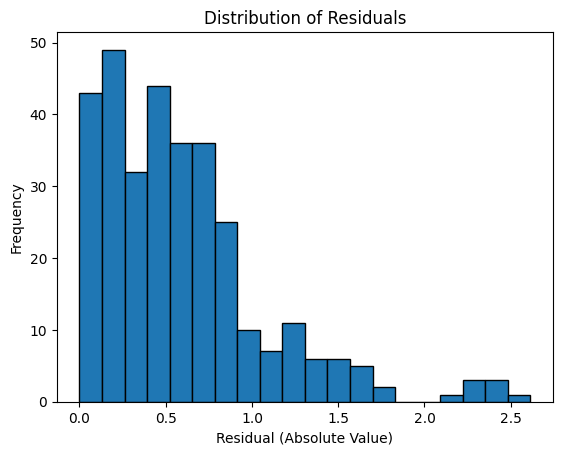

In [8]:
import matplotlib.pyplot as plt


mlp = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', early_stopping=True, validation_fraction=0.2, random_state=0)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
residuals = np.abs(y_test - y_pred)

plt.hist(residuals, bins=20, edgecolor='k')
plt.title("Distribution of Residuals")
plt.xlabel("Residual (Absolute Value)")
plt.ylabel("Frequency")
plt.show()



### 2) [1.5v]

**Since we are in the presence of a integer regression task, a recommended trick is to
round and bound estimates. Assess the impact of these operations on the MAE of the MLP
learnt in previous question.**

In [11]:
from sklearn.metrics import mean_absolute_error

# Calculate the MAE of the original predictions
original_mae = mean_absolute_error(y_val, y_pred)

print(f'Original MAE: {original_mae}')

Original MAE: 0.5297963192092466


In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error


# Split the data into features (X) and target variable (y)
X = data.drop(columns=['quality'])
y = data['quality']


# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 0)
# Create and train an MLP Regressor as in the previous question
mlp = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', early_stopping=True, validation_fraction=0.2)
mlp.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = mlp.predict(X_val)

# Round the predicted values to the nearest integer
rounded_predictions = [round(pred) for pred in y_pred]

# Calculate the MAE of the rounded predictions
mae = mean_absolute_error(y_val, rounded_predictions)

print(f'MAE of rounded predictions: {mae}')

MAE of rounded predictions: 0.478125


/home/joanapeixinho/uni/third_year/apre/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### COMMENT:

The MAE of the rounded predictions is lower than the original MAE. This indicates that rounding the model's predictions to the nearest integer has improved the model's performance in terms of MAE. In this specific integer regression task, rounding the predictions appears to be a beneficial strategy, as it has reduced the absolute prediction errors, making the model's predictions closer to the actual integer wine quality scores.

### 3) [1.5v]

**Similarly assess the impact on RMSE from replacing early stopping by a well-defined
number of iterations in {20,50,100,200} (where one iteration corresponds to a batch).**


In [ ]:
def train_mlp_with_iterations(num_iterations):
    mlp = MLPRegressor(max_iter=num_iterations, random_state=0)
    mlp.fit(X_train, y_train)
    
    y_pred = mlp.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    return rmse

iteration_values = [20, 50, 100, 200]

rmse_values = []

for num_iterations in iteration_values:
    rmse = train_mlp_with_iterations(num_iterations)
    rmse_values.append(rmse)

# Print the RMSE values for different numbers of iterations
for i, num_iterations in enumerate(iteration_values):
    print(f'RMSE for {num_iterations} iterations: {rmse_values[i]}')

### 4) [1.5v]

**Critically comment the results obtained in previous question, hypothesizing at least
one reason why early stopping favors and/or worsens performance.**


In summary, as the number of training iterations increases, the RMSE decreases, which is a positive sign. Lower RMSE values suggest that the model is improving its ability to predict the target variable more accurately. It's important to monitor the RMSE during training to assess the model's convergence and to determine when it reaches a point of diminishing returns or starts to overfit the data.
